In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
x_columns = 10
x = df.iloc[:, 0:x_columns].values
y = df.iloc[:, x_columns].values


In [5]:
 from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
x[0, :]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [8]:
label_encoder = LabelEncoder()
x[:, 1] = label_encoder.fit_transform(x[:, 1])
x[:, 2] = label_encoder.fit_transform(x[:, 2])

In [9]:
one_hot_encoder = OneHotEncoder(categorical_features=[1])
x = one_hot_encoder.fit_transform(x).toarray()
x = x[:, 1:]

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
#x = x[0, :]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<img style="float: center;height:350px; width:600px" src="network.png">

In [13]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(6,), activation='relu', solver='adam', batch_size=10, max_iter=100, random_state=0)
model.fit(x_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
y_pred = model.predict(x_test)


In [15]:
y_test[0:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [16]:
y_pred = (y_pred > 0.5)

In [17]:
y_pred[0:10]

array([False, False, False, False, False,  True, False, False, False,
        True])

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [19]:
confusion_matrix

array([[1506,   89],
       [ 190,  215]])

In [20]:
#print(classification_report(y_test, y_pred))

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


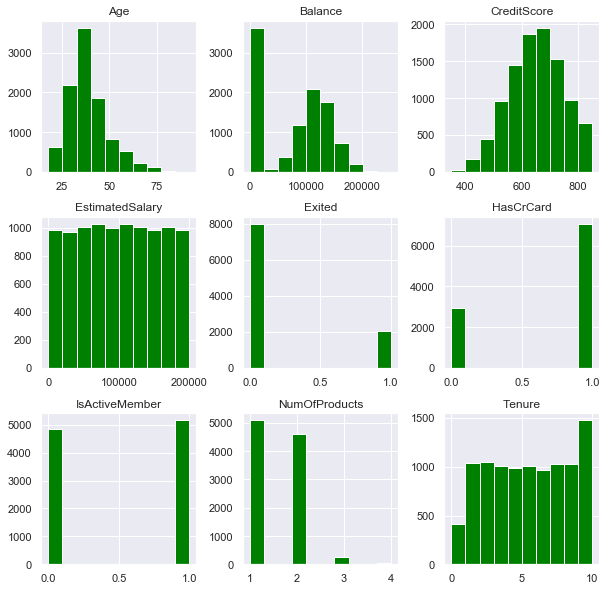

In [22]:
sns.set()
df.hist(figsize=(10,10), color='green')
plt.show()

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


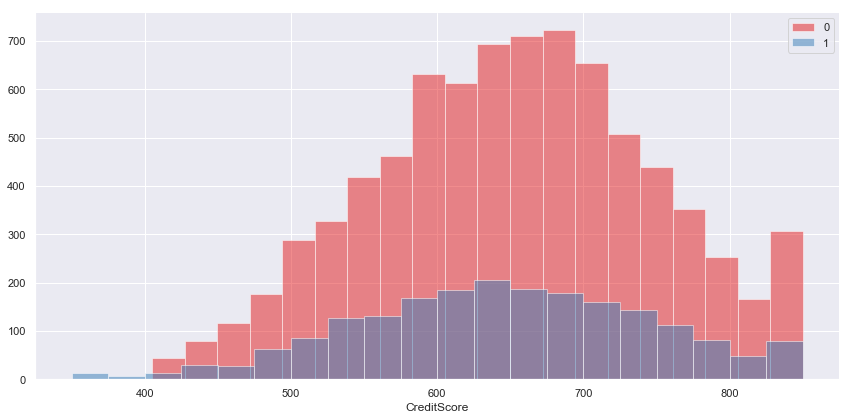

In [23]:
g = sns.FacetGrid(df,hue='Exited',palette='Set1',size=6,aspect=2)

g = g.map(plt.hist,'CreditScore',bins=20,alpha=0.5)
#g = g.map(plt.hist,'Age',bins=20,alpha=0.5)
#g = g.map(plt.hist,'EstimatedSalary',bins=20,alpha=0.5)
plt.legend()

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


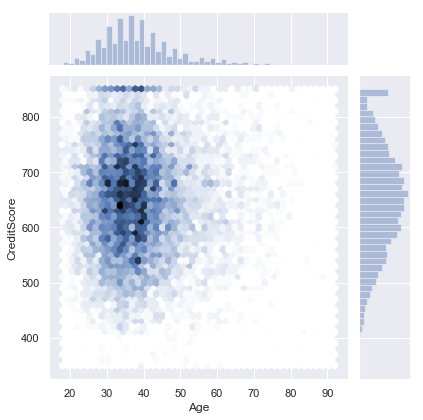

In [24]:
sns.jointplot(x='Age',y='CreditScore',data=df,kind='hex', size = 6)

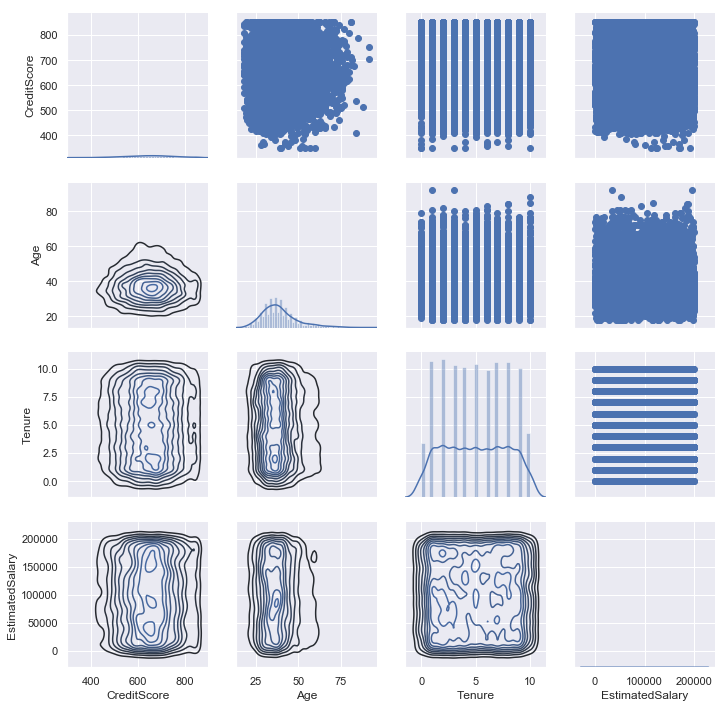

In [25]:
#['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
#       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
#       'Exited']
g = sns.PairGrid(df[['CreditScore', 'Age', 'Tenure', 'EstimatedSalary']])
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [26]:
import pickle as pickle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
models=[("LR",LogisticRegression()), ("DTC", DecisionTreeClassifier()), 
        ("KNC", KNeighborsClassifier()), ("SVC", SVC()), ("GNB", GaussianNB()), 
        ("RFC", RandomForestClassifier())]

#if we want to store results it should be insight of data structure(list, tuple, dictionary..) 

trained_models=[]
my_predictions=[]

from sklearn.metrics import accuracy_score, confusion_matrix

results=[]

for name, model in models:
    #print(element[0])
    _model=model #value 1
    
    _model.fit(x_train, y_train)
    _prediction=_model.predict(x_test)#value 2
    
    _confusion=(confusion_matrix(y_test, _prediction)) #value 3
    _accuracy=(accuracy_score(y_test, _prediction)) #value 4
    
    #print(_model.score(x_test, y_test))
    
    #_model.accuracy_score(y_test, _prediction)
    #_model.score(x_test, y_test)
    
    model_details=[_model, _prediction, _confusion, _accuracy]
    results.append(model_details)
    
    #trained_models.append(_model) #we are appending 6 trained models one by one
    #my_predictions.append(_prediction)
    
#print(my_predictions[0])  
#rint(y_test)

0.811
0.804
0.827
0.8635
0.8295
0.8525


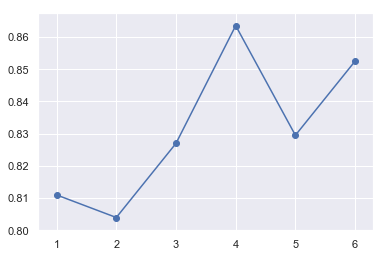

In [28]:
counter=[]
timer=[1,2,3,4,5,6]

for element in results:
    counter.append(element[3])
    print(element[3])

plt.plot(timer, counter)
plt.scatter(timer, counter)
plt.show()